# Ferromagnetic

# Critical temperature

/var/folders/56/k5k1hn6s4pd9x__t6s6fpclr0000gn/T/ipykernel_3639/2188563405.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


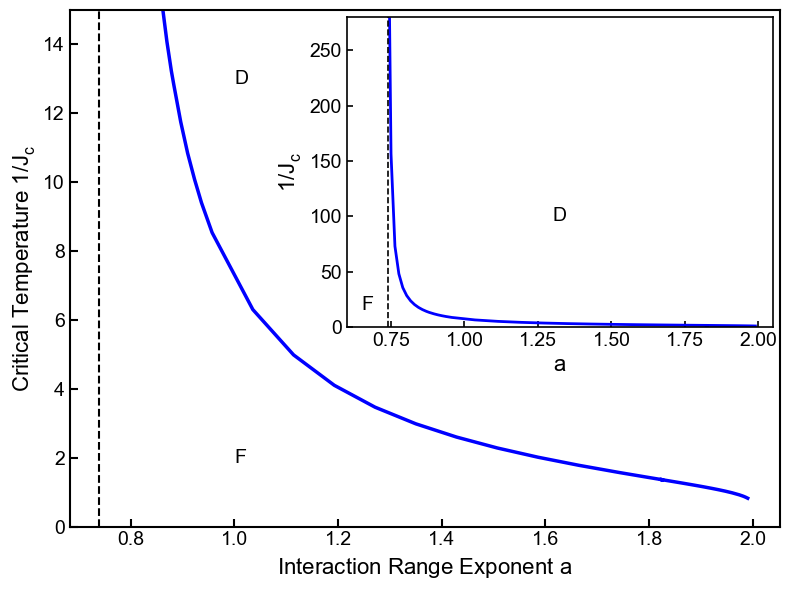

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from utils import load_exponents_csv

# Load the saved exponents data
loaded_data = load_exponents_csv(filename="../data/exponents.csv")
n_values, Jcs, nus, alphas, etas, deltas, betas, gammas = loaded_data


# Set up figure with two vertically stacked subplots, sharing x-axis
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default': 'regular'})
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Top panel: Critical temperature (1/J_c) vs a
ax.plot(n_values, 1/Jcs, marker='', color='b', linewidth=2.5)
ax.axvline(x=0.74, color='k', linestyle='--', linewidth=1.5)
ax.set_xlabel('Interaction Range Exponent $a$', fontsize=16, fontweight='normal')
ax.set_ylabel('Critical Temperature $1/J_c$', fontsize=16, fontweight='normal')
ax.grid(False)
ax.set_ylim(0, 15)
ax.tick_params(axis='both', which='major', labelsize=14, width=1.5, length=6, direction='in')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Inset for top panel
ax_inset = inset_axes(ax, width="60%", height="60%", loc='upper right')
ax_inset.plot(n_values, 1/Jcs, marker='', color='b', linewidth=2)
ax_inset.axvline(x=0.74, color='k', linestyle='--', linewidth=1.2)
ax_inset.set_xlabel('$a$', fontsize=16, fontweight='normal')
ax_inset.set_ylabel('$1/J_c$', fontsize=16, fontweight='normal')
ax_inset.grid(False)
ax_inset.set_xlim(0.6, 2.05)
ax_inset.set_ylim(0, 280)
ax_inset.tick_params(axis='both', which='major', labelsize=14, width=1.2, length=4, direction='in')
for spine in ax_inset.spines.values():
    spine.set_linewidth(1.2)

ax.text(1, 13, 'D', fontsize=14, color='k', ha='left', va='center')
ax.text(1, 2, 'F', fontsize=14, color='k', ha='left', va='center')

ax_inset.text(1.3, 100, 'D', fontsize=14, color='k', ha='left', va='center')
ax_inset.text(.65, 20, 'F', fontsize=14, color='k', ha='left', va='center')

# Adjust layout to prevent overlap
fig.tight_layout()

# Save and show the plot
#plt.savefig('../figures/critical_temperature.png', bbox_inches='tight')
plt.show()

# Critical Exponents

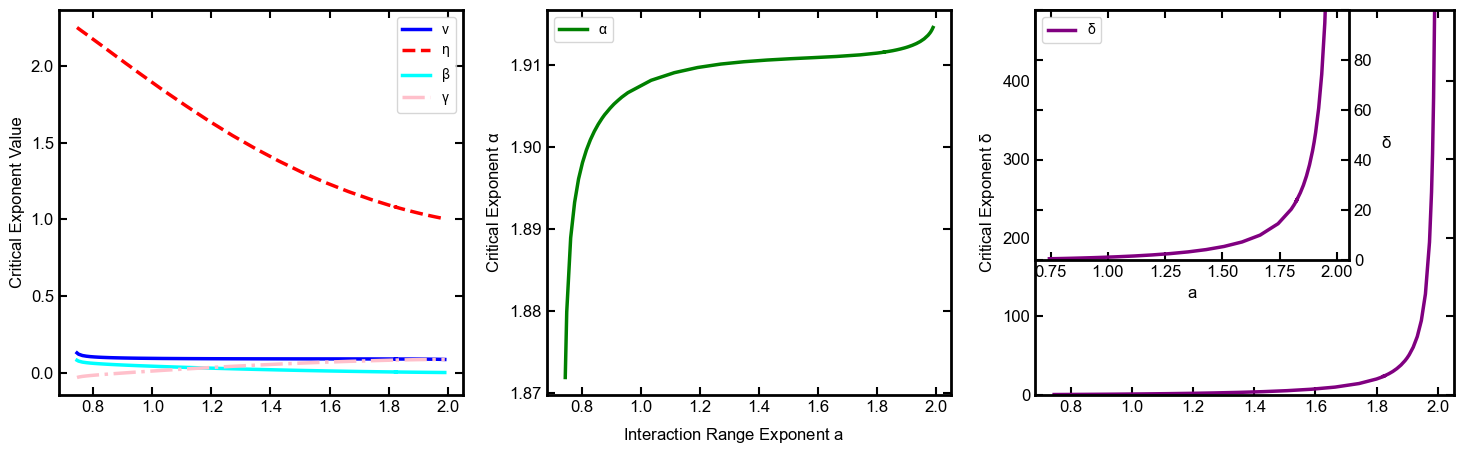

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from utils import load_exponents_csv

# Load the saved exponents data
loaded_data = load_exponents_csv(filename="../data/exponents.csv")
n_values, Jcs, nus, alphas, etas, deltas, betas, gammas = loaded_data

plt.rcParams['axes.linewidth'] = 2  # Axis line width
plt.rcParams['xtick.major.width'] = 2  # X-tick line width
plt.rcParams['ytick.major.width'] = 2  # Y-tick line width
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default': 'regular'})

# Create figure with 3 panels side by side
fig = plt.figure(figsize=(18, 5), dpi=100)
gs = gridspec.GridSpec(1, 100, wspace=0.0)  # 100 columns for fine control

# Left panel
ax1 = fig.add_subplot(gs[0, 0:29])
ax1.plot(n_values, nus, marker='', linestyle='-', linewidth=2.5, color='blue', label=r'$\nu$')
ax1.plot(n_values, etas, marker='', linestyle='--', linewidth=2.5, color='red', label=r'$\eta$')
ax1.plot(n_values, betas, marker='', linestyle='-', linewidth=2.5, color='cyan', label=r'$\beta$')
ax1.plot(n_values, gammas, marker='', linestyle='-.', linewidth=2.5, color='pink', label=r'$\gamma$')
ax1.set_xlabel('Interaction Range Exponent a')
ax1.set_ylabel('Critical Exponent Value', fontsize=12)
ax1.legend()
ax1.grid(False)
#ax1.set_ylim(0, 0.65)
ax1.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
               bottom=True, top=True, left=True, right=True)

# Middle panel
ax2 = fig.add_subplot(gs[0, 35:64])
#ax2 = fig.add_subplot(gs[1])
ax2.plot(n_values, alphas, marker='', linestyle='-', linewidth=2.5, color='green', label=r'$\alpha$')
ax2.set_xlabel('Interaction Range Exponent a')
ax2.set_ylabel(r'Critical Exponent $\alpha$', fontsize=12)
ax2.legend()
ax2.grid(False)
#ax2.set_ylim(1.87, 1.92)
ax2.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
               bottom=True, top=True, left=True, right=True)

# Right panel
#ax3 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[0, 70:100])
ax3.plot(n_values, deltas, marker='', linestyle='-', linewidth=2.5, color='purple', label=r'$\delta$')
ax3.set_xlabel('Interaction Range Exponent a')
ax3.set_ylabel(r'Critical Exponent $\delta$', fontsize=12)
#ax3.set_ylim(0, 2000)
ax3.legend()
ax3.grid(False)
ax3.set_ylim(0, 490)
ax3.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
               bottom=True, top=True, left=True, right=True, labelleft=True, labelright=False)

# Inset for delta
inset_ax = ax3.inset_axes([0, 0.35, 0.75, 0.65])  # [x, y, width, height]
inset_ax.plot(n_values, deltas, marker='', linestyle='-', linewidth=2.5, color='purple')
inset_ax.set_xlabel('a', fontsize=12)
inset_ax.set_ylabel(r'$\delta$', fontsize=12, rotation=0, labelpad=10)
inset_ax.yaxis.set_label_position("right")
inset_ax.grid(False)
inset_ax.set_ylim(0, 100)
inset_ax.set_yticks([0, 20, 40, 60, 80, 100])
inset_ax.set_yticklabels(['0', '20', '40', '60', '80', ''])
inset_ax.tick_params(axis='y', labelleft=False, labelright=True)
inset_ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                    bottom=True, top=True, left=True, right=True, labelright=True)

# Remove individual x-axis labels and add a single x-axis label
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
fig.supxlabel('Interaction Range Exponent $a$', fontsize=12)

# Save and display the plot
#plt.savefig("../figures/exponents.png", bbox_inches='tight', pad_inches=0.05)
plt.show()

/var/folders/56/k5k1hn6s4pd9x__t6s6fpclr0000gn/T/ipykernel_6704/3319497573.py:111: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


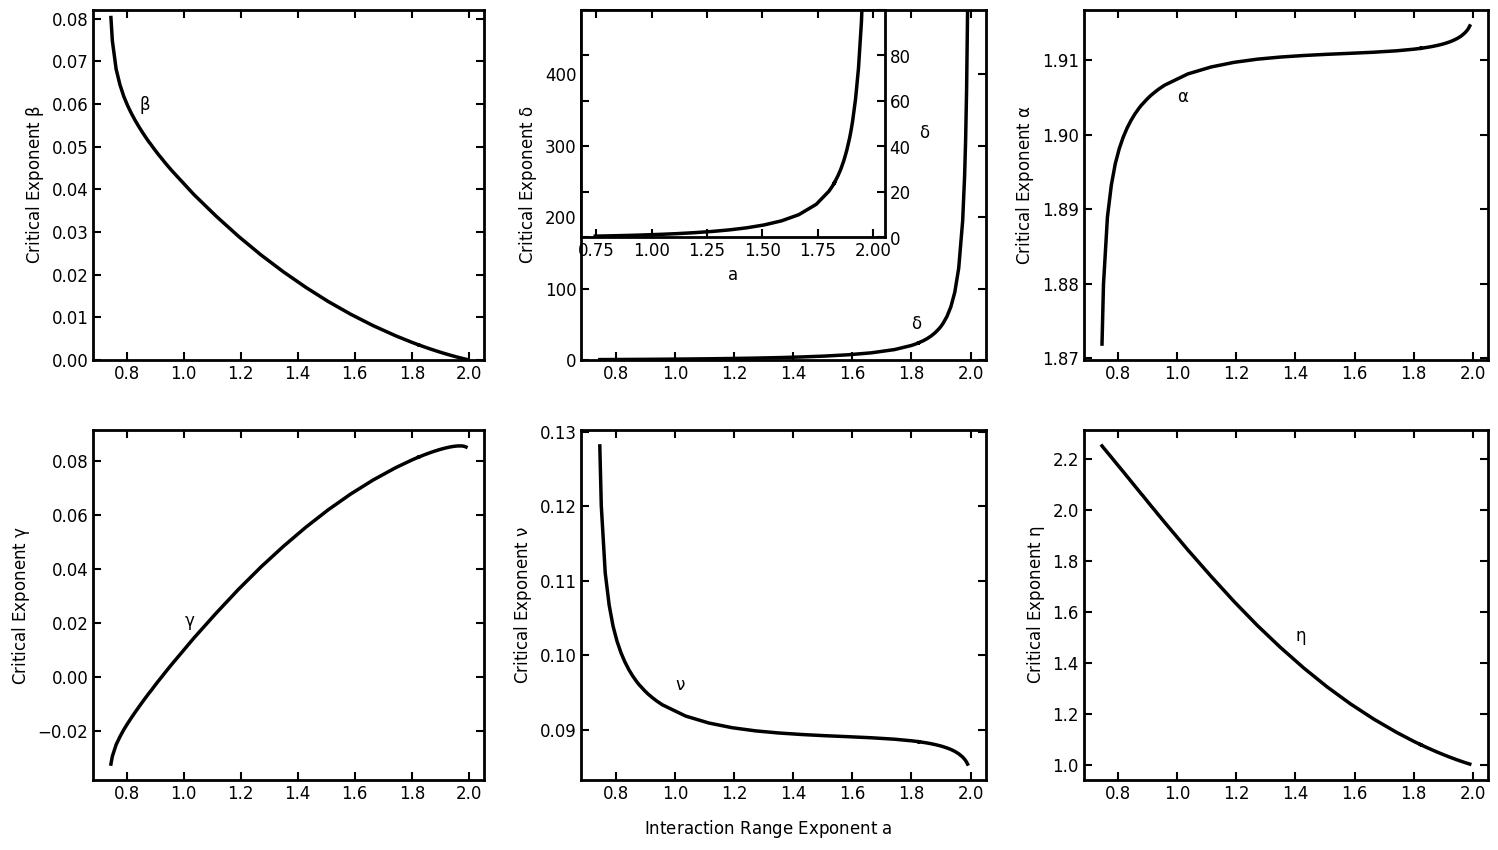

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from utils import load_exponents_csv

# Load the saved exponents data
loaded_data = load_exponents_csv(filename="../data/exponents.csv")
n_values, Jcs, nus, alphas, etas, deltas, betas, gammas = loaded_data

plt.rcParams['axes.linewidth'] = 2  # Axis line width
plt.rcParams['xtick.major.width'] = 2  # X-tick line width
plt.rcParams['ytick.major.width'] = 2  # Y-tick line width
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'DejaVu Sans' #'Arial'
#plt.rcParams.update({'mathtext.default': 'regular'})


# Create figure with 2 rows, 3 columns
fig = plt.figure(figsize=(18, 10), dpi=100)
gs = gridspec.GridSpec(2, 100, wspace=0.0)

# Panel 1: beta (top-left)
ax1 = fig.add_subplot(gs[0, 0:28])
ax1.plot(n_values, betas, marker='', linestyle='-', linewidth=2.5, color='k', label=r'$\beta$')
ax1.set_ylim(0, 0.082)
ax1.set_xlabel('Interaction Range Exponent $a$')
ax1.set_ylabel(r'Critical Exponent $\beta$', fontsize=12)
ax1.grid(False)
ax1.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                bottom=True, top=True, left=True, right=True)
ax1.text(n_values[8], betas[5], r'$\beta$', fontsize=12, color='k', ha='left', va='center')

# Panel 2: delta (top-middle)
ax2 = fig.add_subplot(gs[0, 35:64])
ax2.plot(n_values, deltas, marker='', linestyle='-', linewidth=2.5, color='k', label=r'$\delta$')
ax2.set_xlabel('Interaction Range Exponent $a$')
ax2.set_ylabel(r'Critical Exponent $\delta$', fontsize=12)
ax2.grid(False)
ax2.set_ylim(0, 490)
ax2.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                bottom=True, top=True, left=True, right=True, labelleft=True, labelright=False)
ax2.text(1.8, 50, r'$\delta$', fontsize=12, color='k', ha='left', va='center')

# Inset for delta
inset_ax = ax2.inset_axes([0, 0.35, 0.75, 0.65])  # [x, y, width, height]
inset_ax.plot(n_values, deltas, marker='', linestyle='-', linewidth=2.5, color='k')
inset_ax.set_xlabel('a', fontsize=12)
inset_ax.set_ylabel(r'$\delta$', fontsize=12, rotation=0, labelpad=10)
inset_ax.yaxis.set_label_position("right")
inset_ax.grid(False)
inset_ax.set_ylim(0, 100)
inset_ax.set_yticks([0, 20, 40, 60, 80, 100])
inset_ax.set_yticklabels(['0', '20', '40', '60', '80', ''])
inset_ax.tick_params(axis='y', labelleft=False, labelright=True)
inset_ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                     bottom=True, top=True, left=True, right=True, labelleft=False, labelright=True)

# Panel 3: alpha (top-right)
ax3 = fig.add_subplot(gs[0, 71:100])
ax3.plot(n_values, alphas, marker='', linestyle='-', linewidth=2.5, color='k', label=r'$\alpha$')
ax3.set_xlabel('Interaction Range Exponent $a$')
ax3.set_ylabel(r'Critical Exponent $\alpha$', fontsize=12)
ax3.grid(False)
ax3.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                bottom=True, top=True, left=True, right=True, labelleft=True, labelright=False)
ax3.text(1, 1.905, r'$\alpha$', fontsize=12, color='k', ha='left', va='center')

# Panel 4: gamma (bottom-left)
ax4 = fig.add_subplot(gs[1, 0:28])
ax4.plot(n_values, gammas, marker='', linestyle='-', linewidth=2.5, color='k', label=r'$\gamma$')
ax4.set_xlabel(r'Interaction Range Exponent $a$')
ax4.set_ylabel(r'Critical Exponent $\gamma$', fontsize=12)
ax4.grid(False)
ax4.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                bottom=True, top=True, left=True, right=True)
ax4.text(1, 0.02, r'$\gamma$', fontsize=12, color='k', ha='left', va='center')

# Panel 5: nu (bottom-left)
ax5 = fig.add_subplot(gs[1, 35:64])
ax5.plot(n_values, nus, marker='', linestyle='-', linewidth=2.5, color='k', label=r'$\nu$')
ax5.set_xlabel(r'Interaction Range Exponent $a$')
ax5.set_ylabel(r'Critical Exponent $\nu$', fontsize=12)
ax5.grid(False)
ax5.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                bottom=True, top=True, left=True, right=True, labelleft=True, labelright=False)
ax5.text(1, 0.096, r'$\nu$', fontsize=12, color='k', ha='left', va='center')

# Panel 6: eta (bottom-right)
ax6 = fig.add_subplot(gs[1, 71:100])
ax6.plot(n_values, etas, marker='', linestyle='-', linewidth=2.5, color='k', label=r'$\eta$')
ax6.set_xlabel('Interaction Range Exponent a')
ax6.set_ylabel(r'Critical Exponent $\eta$', fontsize=12)
ax6.grid(False)
ax6.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6, direction='in',
                bottom=True, top=True, left=True, right=True, labelleft=True, labelright=False)
ax6.text(1.4, 1.5, r'$\eta$', fontsize=12, color='k', ha='left', va='center')

# Remove individual x-axis labels and add a single x-axis label
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')
fig.supxlabel('Interaction Range Exponent $a$', fontsize=12,
              x=0.5, y=0.05)

# Adjust layout to minimize blank space
fig.tight_layout()

# Save and display the plot
#plt.savefig("../figures/exponents.png", bbox_inches='tight', pad_inches=0.05)
plt.show()

# Spin Glass

In [106]:
h_n1_5000_1 = np.array([
[0.0, 3.6624082790691226],
[0.034482758620689655 ,3.4017223108958357],
[0.06896551724137931  ,3.351592512210967],
[0.10344827586206896  ,2.8587213532958295],
[0.13793103448275862  ,2.5617041808301773],
[0.1724137931034483   ,2.134404950697513],
[0.20689655172413793  ,2.3746436212212414],
[0.24137931034482757  ,2.967230249865449],
[0.27586206896551724  ,1.8424005208441605],
[0.3448275862068966   ,1.887687934124147],
[0.3793103448275862   ,1.576305161202348],
[0.41379310344827586  ,2.075274283563536],
[0.4482758620689655   ,1.330919353738651],
[0.48275862068965514  ,0.5670334896167744],
])

h_n1_5000_2 = np.array([
[0.0               , 3.62799878556483],
[0.1111111111111111, 3.3500910944674795],
[0.2222222222222222, 3.3683674913295323],
[0.4444444444444444, 1.3498053865882322],
[0.5555555555555556, 0.01000000476360548],
[0.6666666666666666, 0.01000000476360548],
[0.7777777777777777, 0.166776333177753],
[0.8888888888888888, 0.01000000476360548]
])



h_n1_22000 = np.array([
[0.0, 3.616747725727251],
[0.07142857142857142,3.3447533682351205],
[0.14285714285714285, 2.8560265213980145],
[0.21428571428571427, 1.9202369237635126],
[0.2857142857142857, 1.6809809548321812],
[0.3571428571428571, 1.4795701133824506],
[0.4, 1.195047948037132],
[0.42857142857142855, 1.0504527914798976]
])



v_n1_22000 = np.array([
[0.183380126953125, 2.223333333333333],
[0.155975341796875, 2.5],
[0.155975341796875, 2.5075]
])

####################################

horizontal = np.array([
[0.0, 3.616747725727251],
[0.07142857142857142,3.3447533682351205],
[0.14285714285714285, 2.8560265213980145],
[0.21428571428571427, 1.9202369237635126],
[0.2857142857142857, 1.6809809548321812],
[0.3571428571428571, 1.4795701133824506],
[0.4, 1.195047948037132],
[0.42857142857142855, 1.0504527914798976],
[0.5555555555555556, 0.01000000476360548],
])

vertical = np.array([
[0.183380126953125, 2.223333333333333],
[0.41036682128906254, 2.2525],
[0.4271209716796875, 1.50500],
[0.4938079833984375, 0.75750],
[0.5026519775390625, 0.01],
    [.5: Tc=0.8818808157811332],
])

#[0.4938079833984375, 0.75750],
#[0.4271209716796875, 1.50500],
#[0.41036682128906254, 2.2525],          
#[0.41036682128906254, 3.0],              

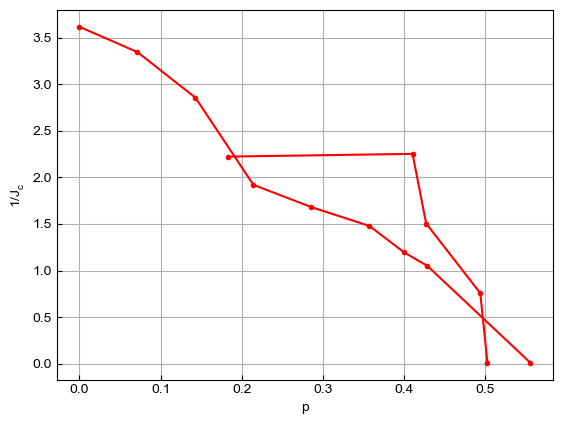

In [108]:
plt.figure()
#plt.plot(h_n1_5000_1[:,0], h_n1_5000_1[:,1], marker='.', color='gray')
#plt.plot(h_n1_5000_2[:,0], h_n1_5000_2[:,1], marker='.', color='black')

#plt.plot(horizontal[:,0], horizontal[:,1], marker='.', color='r')
#plt.plot(vertical[:,0], vertical[:,1], marker='.', color='r')
plt.xlabel('p')
plt.ylabel('$1/J_c$')
plt.grid(False)
#plt.xlim((0.7, 2))
#plt.ylim((0, 31))
#plt.savefig('Jc-n_right.png')
plt.show()